### Predicting Dota 2 Draft Strength Using Keras.

### Using Team Heroes Input or Hero Input we will try to predict which draft has a better chance of winning.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ffnn_model import ffnn_hero_model, ffnn_team_model
from lstm_model import lstm_hero_model, lstm_team_model
from lstm_ffnn_model import lstm_ffnn_hero_model, lstm_ffnn_team_model
from cycler import cycler


C:\Users\shrin\AppData\Local\conda\conda\envs\Work\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Structuring data for Hero Model.

#### Import Data as Pandas Dataframe Object.

In [2]:
Dota_2_DF = pd.read_csv('Dota_2_Cleaned_Data.csv')
Dota_2_DF_Label = pd.read_csv('Dota_2_Model_Data.csv')


In [3]:
print(Dota_2_DF_Label.shape)
print(Dota_2_DF.shape)

(108800, 17)
(544000, 18)


#### View Dataframe.

In [4]:
Dota_2_DF_Label.head(1)

,Unnamed: 0,Hero_1,Hero_2,Hero_3,Hero_4,Hero_5,Kills,Deaths,Assists,Last_Hits,Denies,GPM,XPM,Networth,XP,Win/Loss,Duration
0,0,34,63,83,67,97,39,48,79,1499,17,2312,2824,122085,181281,5,3647


In [5]:
Dota_2_DF.head(1)

,Unnamed: 0,Hero_ID,Hero_ID_2,Kills,Deaths,Assists,Available_Gold,Last_Hits,Denies,GPM,XPM,Networth,XP,Stat_1,MVP_Votes,Duration,Win/Loss,Match_ID
0,0,34,34,5,10,16,6859,474,3,549,558,26655,45146,41,0,3647,1,0


#### Taking 50000 matches data and defining model variables and label.

In [6]:
Label_Data = Dota_2_DF_Label.iloc[::2]
Dota_2_DF =Dota_2_DF.head(500000)
Label_Data = Label_Data.head(50000)['Win/Loss']
Label_Data = Label_Data.values
Label_Data[Label_Data >= 1] = 1

#### Taking ID for every Hero in respective variable, where Hero_1 to Hero_5 is Team 1 and Hero_6 to Hero_10 is Team 2


In [7]:
Hero_1 = Dota_2_DF.iloc[::10, :]['Hero_ID']
Hero_1 = Hero_1.values
Hero_2 = Dota_2_DF.iloc[1::10, :]['Hero_ID']
Hero_2 = Hero_2.values
Hero_3 = Dota_2_DF.iloc[2::10, :]['Hero_ID']
Hero_3 = Hero_3.values
Hero_4 = Dota_2_DF.iloc[3::10, :]['Hero_ID']
Hero_4 = Hero_4.values
Hero_5 = Dota_2_DF.iloc[4::10, :]['Hero_ID']
Hero_5 = Hero_5.values
Hero_6 = Dota_2_DF.iloc[5::10, :]['Hero_ID']
Hero_6 = Hero_6.values
Hero_7 = Dota_2_DF.iloc[6::10, :]['Hero_ID']
Hero_7 = Hero_7.values
Hero_8 = Dota_2_DF.iloc[7::10, :]['Hero_ID']
Hero_8 = Hero_8.values
Hero_9 = Dota_2_DF.iloc[8::10, :]['Hero_ID']
Hero_9 = Hero_9.values
Hero_10 = Dota_2_DF.iloc[9::10, :]['Hero_ID']
Hero_10 = Hero_10.values

#### Shuffling the entire dataset to disrupt the order of matches according to time to prevent any bias.

#### As the dataset has recorded all matches between a duration of an hour and we need our model to have data for any time and not skewed towards the eary or later part of the hour.

In [8]:
Permutation = np.random.permutation(Hero_1.shape[0])
Hero_1 = Hero_1[Permutation]
Hero_2 = Hero_2[Permutation]
Hero_3 = Hero_3[Permutation]
Hero_4 = Hero_4[Permutation]
Hero_5 = Hero_5[Permutation]
Hero_6 = Hero_6[Permutation]
Hero_7 = Hero_7[Permutation]
Hero_8 = Hero_8[Permutation]
Hero_9 = Hero_9[Permutation]
Hero_10 = Hero_10[Permutation]
Label_Data = Label_Data[Permutation]

#### Training & Testing Data - Hero ID.


#### Label = 1, means First 5 Heroes lineup won. Label = 0, means Last 5 Heroes lineup won.

In [9]:
Hero_1_Tr = Hero_1[0:40000]
Hero_2_Tr = Hero_2[0:40000]
Hero_3_Tr = Hero_3[0:40000]
Hero_4_Tr = Hero_4[0:40000]
Hero_5_Tr = Hero_5[0:40000]
Hero_6_Tr = Hero_6[0:40000]
Hero_7_Tr = Hero_7[0:40000]
Hero_8_Tr = Hero_8[0:40000]
Hero_9_Tr = Hero_9[0:40000]
Hero_10_Tr = Hero_10[0:40000]
Train_L = Label_Data[0:40000]

Hero_1_Ts = Hero_1[40000:]
Hero_2_Ts = Hero_2[40000:]
Hero_3_Ts = Hero_3[40000:]
Hero_4_Ts = Hero_4[40000:]
Hero_5_Ts = Hero_5[40000:]
Hero_6_Ts = Hero_6[40000:]
Hero_7_Ts = Hero_7[40000:]
Hero_8_Ts = Hero_8[40000:]
Hero_9_Ts = Hero_9[40000:]
Hero_10_Ts = Hero_10[40000:]
Test_L = Label_Data[40000:]

print(Hero_1_Tr[0:5])
print(Hero_1_Ts[0:5])
print(Train_L[0:5])
print(Test_L[0:5])

[110   6   6   4  44]
[ 42  12 104   9  22]
[0 1 0 0 0]
[0 1 0 1 0]


#### Structuring data for Team Model.

#### Import Data as Pandas Dataframe Object.

In [10]:
Dota_2_DF = pd.read_csv('Dota_2_Model_Data.csv')

In [11]:
print(Dota_2_DF.shape)

(108800, 17)


#### Taking 50000 matches data and defining model variables and label.

In [12]:
Dota_2_DF = Dota_2_DF.head(100000)
# Select Rows with Even Indices
Team_1 = Dota_2_DF.iloc[::2]
# Select Rows with Odd Indices
Team_2 = Dota_2_DF.iloc[1::2]
Label_Data = Team_1[['Win/Loss']]
Label_Data = Label_Data.values
Label_Data[Label_Data >= 1] = 1
Team_1 = Team_1[['Hero_1', 'Hero_2', 'Hero_3', 'Hero_4', 'Hero_5']]
Team_2 = Team_2[['Hero_1', 'Hero_2', 'Hero_3', 'Hero_4', 'Hero_5']]
Team_1 = Team_1.values
Team_2 = Team_2.values

#### Shuffling the entire dataset to disrupt the order of matches according to time to prevent any bias.

#### As the dataset has recorded all matches between a duration of an hour and we need our model to have data for any time and not skewed towards the eary or later part of the hour.

In [13]:
Permutation = np.random.permutation(Team_1.shape[0])
Team_1 = Team_1[Permutation]
Team_2 = Team_2[Permutation]
Label_Data = Label_Data[Permutation]

#### Training & Testing Data - Hero ID.

#### Label = 1 Means Team 1 Won and Label = 0 Means Team 2 Won.

In [14]:
Training_Team_1 = Team_1[:40000]
Training_Team_2 = Team_2[:40000]
Train_L_T = Label_Data[:40000]

Testing_Team_1 = Team_1[40000:]
Testing_Team_2 = Team_2[40000:]
Test_L_T = Label_Data[40000:]

print(Training_Team_1[0])
print(Training_Team_2[0])
print(Testing_Team_1[0])
print(Testing_Team_2[0])
print(Train_L_T[0])
print(Test_L_T[0])

[85 17 53 29 40]
[104  35  20  49  90]
[20 27 53 74 13]
[ 21  75 119 118  14]
[0]
[1]


#### Hero Input Feed Forward Neural Network Model.

In [15]:
Model_T, Batch_Size = ffnn_hero_model()
Model_T.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_5 (I

In [16]:
Batch_Size

256

#### Training the Model.

In [17]:
Model_History = Model_T.fit([Hero_1_Tr, Hero_2_Tr, Hero_3_Tr, Hero_4_Tr, Hero_5_Tr, Hero_6_Tr, Hero_7_Tr, Hero_8_Tr, Hero_9_Tr, Hero_10_Tr], Train_L, epochs=5, verbose = 1, batch_size= Batch_Size, validation_data =([Hero_1_Ts, Hero_2_Ts, Hero_3_Ts, Hero_4_Ts, Hero_5_Ts, Hero_6_Ts, Hero_7_Ts, Hero_8_Ts, Hero_9_Ts, Hero_10_Ts], Test_L))

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 1s 30us/step - loss: 0.6938 - acc: 0.5199 - val_loss: 0.6927 - val_acc: 0.5203
Epoch 2/5
40000/40000 [==============================] - 0s 9us/step - loss: 0.6914 - acc: 0.5263 - val_loss: 0.6925 - val_acc: 0.5205
Epoch 3/5
40000/40000 [==============================] - 0s 10us/step - loss: 0.6912 - acc: 0.5284 - val_loss: 0.6920 - val_acc: 0.5201
Epoch 4/5
40000/40000 [==============================] - 0s 9us/step - loss: 0.6909 - acc: 0.5308 - val_loss: 0.6916 - val_acc: 0.5248
Epoch 5/5
40000/40000 [==============================] - 0s 9us/step - loss: 0.6906 - acc: 0.5313 - val_loss: 0.6919 - val_acc: 0.5211


#### Plotting accuracy of the model.

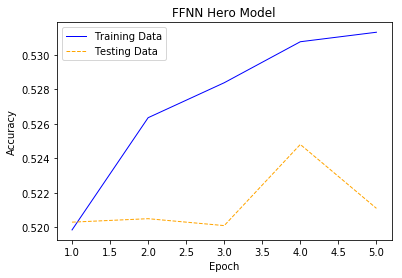

In [18]:
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=(cycler(color=['blue', 'orange']) +
                           cycler(linestyle=['-', '--'])))
y1 = Model_History.history['acc']
y2 = Model_History.history['val_acc']
x = np.array([1,2,3,4,5])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, y1, label='Training Data')
plt.plot(x, y2, label='Testing Data')
plt.title('FFNN Hero Model')
plt.legend()
plt.savefig('Hero_FFNN_Model.png')
plt.show()

#### Team Input Feed Forward Network Model.

In [19]:
Model_T, Batch_Size = ffnn_team_model()
Model_T.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 64)           384         input_11[0][0]                   
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 64)           384         input_12[0][0]                   
__________________________________________________________________________________________________
add_4 (Add

In [20]:
Batch_Size

128

#### Training the Model.

In [21]:
Model_History = Model_T.fit([Training_Team_1, Training_Team_2], Train_L_T, epochs=5, verbose = 1, batch_size= Batch_Size, validation_data =([Testing_Team_1, Testing_Team_2], Test_L_T))

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 1s 24us/step - loss: 0.6964 - acc: 0.5151 - val_loss: 0.6940 - val_acc: 0.5202
Epoch 2/5
40000/40000 [==============================] - 0s 12us/step - loss: 0.6924 - acc: 0.5242 - val_loss: 0.6913 - val_acc: 0.5235
Epoch 3/5
40000/40000 [==============================] - 0s 12us/step - loss: 0.6918 - acc: 0.5257 - val_loss: 0.6925 - val_acc: 0.5120
Epoch 4/5
40000/40000 [==============================] - 0s 12us/step - loss: 0.6918 - acc: 0.5229 - val_loss: 0.6907 - val_acc: 0.5305
Epoch 5/5
40000/40000 [==============================] - 0s 12us/step - loss: 0.6920 - acc: 0.5215 - val_loss: 0.6907 - val_acc: 0.5332


#### Plotting accuracy of the model. 

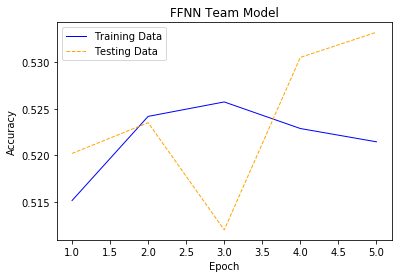

In [22]:
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=(cycler(color=['blue', 'orange']) +
                           cycler(linestyle=['-', '--'])))
y1 = Model_History.history['acc']
y2 = Model_History.history['val_acc']
x = np.array([1,2,3,4,5])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, y1, label='Training Data')
plt.plot(x, y2, label='Testing Data')
plt.title('FFNN Team Model')
plt.legend()
plt.savefig('Team_FFNN_Model.png')
plt.show()

#### Hero Input Long/Short Term Memory Model.

In [23]:
Model_T, Batch_Size = lstm_hero_model()
Model_T.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
hero_1 (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
hero_2 (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
hero_3 (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
hero_4 (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
hero_5 (In

In [24]:
Batch_Size

256

#### Training the Model.

In [25]:
Model_History = Model_T.fit([Hero_1_Tr, Hero_2_Tr, Hero_3_Tr, Hero_4_Tr, Hero_5_Tr, Hero_6_Tr, Hero_7_Tr, Hero_8_Tr, Hero_9_Tr, Hero_10_Tr], Train_L, epochs=5, verbose = 1, batch_size= Batch_Size, validation_data =([Hero_1_Ts, Hero_2_Ts, Hero_3_Ts, Hero_4_Ts, Hero_5_Ts, Hero_6_Ts, Hero_7_Ts, Hero_8_Ts, Hero_9_Ts, Hero_10_Ts], Test_L))

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 9s 231us/step - loss: 0.6919 - acc: 0.5260 - val_loss: 0.6927 - val_acc: 0.5174
Epoch 2/5
40000/40000 [==============================] - 2s 51us/step - loss: 0.6915 - acc: 0.5278 - val_loss: 0.6926 - val_acc: 0.5173
Epoch 3/5
40000/40000 [==============================] - 2s 50us/step - loss: 0.6913 - acc: 0.5282 - val_loss: 0.6928 - val_acc: 0.5174
Epoch 4/5
40000/40000 [==============================] - 2s 50us/step - loss: 0.6910 - acc: 0.5295 - val_loss: 0.6929 - val_acc: 0.5143
Epoch 5/5
40000/40000 [==============================] - 2s 50us/step - loss: 0.6909 - acc: 0.5291 - val_loss: 0.6928 - val_acc: 0.5157


#### Plotting accuracy of the model.

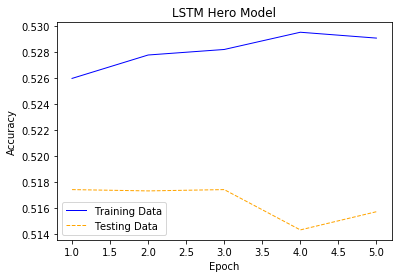

In [26]:
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=(cycler(color=['blue', 'orange']) +
                           cycler(linestyle=['-', '--'])))
y1 = Model_History.history['acc']
y2 = Model_History.history['val_acc']
x = np.array([1,2,3,4,5])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, y1, label='Training Data')
plt.plot(x, y2, label='Testing Data')
plt.title('LSTM Hero Model')
plt.legend()
plt.savefig('Hero_LSTM_Model.png')
plt.show()

#### Team Input Long/Short Term Memory Model.

In [27]:
Model_T, Batch_Size = lstm_team_model()
Model_T.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Team_1 (InputLayer)             (None, 5)            0                                            
__________________________________________________________________________________________________
Team_2 (InputLayer)             (None, 5)            0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 5, 32)        4000        Team_1[0][0]                     
                                                                 Team_2[0][0]                     
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 32)           8320        embedding_2[0][0]                
          

In [28]:
Batch_Size

128

#### Training the Model.

In [29]:
Model_History = Model_T.fit([Training_Team_1, Training_Team_2], Train_L_T, epochs=5, verbose = 1, batch_size= Batch_Size, validation_data =([Testing_Team_1, Testing_Team_2], Test_L_T))

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 6s 142us/step - loss: 0.6922 - acc: 0.5232 - val_loss: 0.6912 - val_acc: 0.5329
Epoch 2/5
40000/40000 [==============================] - 3s 83us/step - loss: 0.6917 - acc: 0.5232 - val_loss: 0.6924 - val_acc: 0.5255
Epoch 3/5
40000/40000 [==============================] - 3s 81us/step - loss: 0.6913 - acc: 0.5266 - val_loss: 0.6931 - val_acc: 0.5135
Epoch 4/5
40000/40000 [==============================] - 3s 83us/step - loss: 0.6908 - acc: 0.5283 - val_loss: 0.6925 - val_acc: 0.5290
Epoch 5/5
40000/40000 [==============================] - 3s 85us/step - loss: 0.6905 - acc: 0.5286 - val_loss: 0.6940 - val_acc: 0.5129


#### Plotting accuracy of the model.

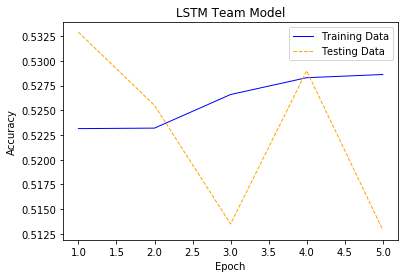

In [30]:
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=(cycler(color=['blue', 'orange']) +
                           cycler(linestyle=['-', '--'])))
y1 = Model_History.history['acc']
y2 = Model_History.history['val_acc']
x = np.array([1,2,3,4,5])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, y1, label='Training Data')
plt.plot(x, y2, label='Testing Data')
plt.title('LSTM Team Model')
plt.legend()
plt.savefig('Team_LSTM_Model.png')
plt.show()

#### Hero Input Long/Short Term Memory & Feed Forward Neural Network Model.

In [31]:
Model_T, Batch_Size = lstm_ffnn_hero_model()
Model_T.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
hero_1 (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
hero_2 (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
hero_3 (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
hero_4 (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
hero_5 (In

In [32]:
Batch_Size

64

#### Training the Model.

In [33]:
Model_History = Model_T.fit([Hero_1_Tr, Hero_2_Tr, Hero_3_Tr, Hero_4_Tr, Hero_5_Tr, Hero_6_Tr, Hero_7_Tr, Hero_8_Tr, Hero_9_Tr, Hero_10_Tr], Train_L, epochs=5, verbose = 1, batch_size= Batch_Size, validation_data =([Hero_1_Ts, Hero_2_Ts, Hero_3_Ts, Hero_4_Ts, Hero_5_Ts, Hero_6_Ts, Hero_7_Ts, Hero_8_Ts, Hero_9_Ts, Hero_10_Ts], Test_L))

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 16s 408us/step - loss: 0.6713 - acc: 0.5805 - val_loss: 0.6683 - val_acc: 0.5968
Epoch 2/5
40000/40000 [==============================] - 7s 176us/step - loss: 0.6657 - acc: 0.5940 - val_loss: 0.6696 - val_acc: 0.5848
Epoch 3/5
40000/40000 [==============================] - 7s 177us/step - loss: 0.6652 - acc: 0.5944 - val_loss: 0.6667 - val_acc: 0.5951
Epoch 4/5
40000/40000 [==============================] - 7s 174us/step - loss: 0.6649 - acc: 0.5967 - val_loss: 0.6679 - val_acc: 0.5873
Epoch 5/5
40000/40000 [==============================] - 7s 167us/step - loss: 0.6646 - acc: 0.5971 - val_loss: 0.6677 - val_acc: 0.5929


#### Plotting accuracy of the model.

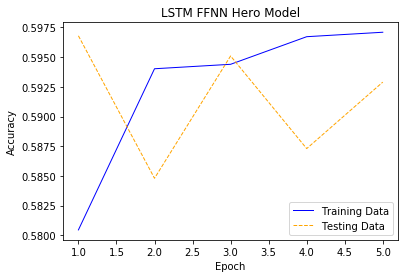

In [34]:
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=(cycler(color=['blue', 'orange']) +
                           cycler(linestyle=['-', '--'])))
y1 = Model_History.history['acc']
y2 = Model_History.history['val_acc']
x = np.array([1,2,3,4,5])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, y1, label='Training Data')
plt.plot(x, y2, label='Testing Data')
plt.title('LSTM FFNN Hero Model')
plt.legend()
plt.savefig('Hero_LSTM_FFNN_Model.png')
plt.show()

#### Team Input Long/Short Term Memory & Feed Forward Neural Network Model.


In [35]:
Model_T, Batch_Size = lstm_ffnn_team_model()
Model_T.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Team_1 (InputLayer)             (None, 5)            0                                            
__________________________________________________________________________________________________
Team_2 (InputLayer)             (None, 5)            0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 5, 32)        4000        Team_1[0][0]                     
                                                                 Team_2[0][0]                     
__________________________________________________________________________________________________
lstm_4 (LSTM)                   (None, 32)           8320        embedding_4[0][0]                
          

In [36]:
Batch_Size

64

#### Training the Model.

In [37]:
Model_History = Model_T.fit([Training_Team_1, Training_Team_2], Train_L_T, epochs=5, verbose = 1, batch_size= Batch_Size, validation_data =([Testing_Team_1, Testing_Team_2], Test_L_T))

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 9s 236us/step - loss: 0.6727 - acc: 0.5799 - val_loss: 0.6671 - val_acc: 0.5913
Epoch 2/5
40000/40000 [==============================] - 5s 136us/step - loss: 0.6659 - acc: 0.5931 - val_loss: 0.6676 - val_acc: 0.5923
Epoch 3/5
40000/40000 [==============================] - 6s 151us/step - loss: 0.6650 - acc: 0.5965 - val_loss: 0.6695 - val_acc: 0.5931
Epoch 4/5
40000/40000 [==============================] - 6s 151us/step - loss: 0.6643 - acc: 0.5956 - val_loss: 0.6677 - val_acc: 0.5923
Epoch 5/5
40000/40000 [==============================] - 7s 179us/step - loss: 0.6635 - acc: 0.5962 - val_loss: 0.6693 - val_acc: 0.5895


#### Plotting accuracy of the model.

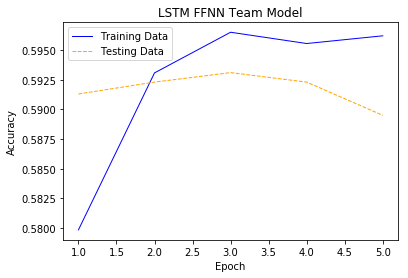

In [38]:
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=(cycler(color=['blue', 'orange']) +
                           cycler(linestyle=['-', '--'])))
y1 = Model_History.history['acc']
y2 = Model_History.history['val_acc']
x = np.array([1,2,3,4,5])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, y1, label='Training Data')
plt.plot(x, y2, label='Testing Data')
plt.title('LSTM FFNN Team Model')
plt.legend()
plt.savefig('Team_LSTM_FFNN_Model.png')
plt.show()